## EDA

This notebook covers initial exploratory analysis for the data related to clustering.



In [126]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [127]:
cwd = os.getcwd()
RAW_DATA_DIR = os.path.join(cwd, '..', 'data', 'raw')

In [131]:
def load_data():
    """Load all required CSV files"""
    consumptions = pd.read_csv(os.path.join(RAW_DATA_DIR,'customers_consumptions.csv'))
    metadata = pd.read_csv(os.path.join(RAW_DATA_DIR,'customers_metadata.csv'))
    weather = pd.read_csv(os.path.join(RAW_DATA_DIR,'weather_data.csv'))
    prices = pd.read_csv(os.path.join(RAW_DATA_DIR,'price_data.csv'))
    
    # Convert timestamp columns to datetime
    consumptions['validfrom'] = pd.to_datetime(consumptions['validfrom'])
    weather['validfrom'] = pd.to_datetime(weather['validfrom'])
    prices['validfrom'] = pd.to_datetime(prices['validfrom'])
    
    # sort outputs
    consumptions = consumptions.sort_values(by=["meteringpoint_id", "validfrom"])
    weather = weather.sort_values(by=["weatherstation_id", "validfrom"])
    
    return consumptions, metadata, weather, prices

In [129]:
consumptions_df, metadata_df, weather_df, prices_df = load_data()

In [130]:
consumptions_df

meteringpoint_id                 validfrom  \
4       261b7930-dd7e-43f0-8a42-4f31d97f9edb 2024-01-01 00:00:00+00:00   
14      261b7930-dd7e-43f0-8a42-4f31d97f9edb 2024-01-01 00:15:00+00:00   
22      261b7930-dd7e-43f0-8a42-4f31d97f9edb 2024-01-01 00:30:00+00:00   
28      261b7930-dd7e-43f0-8a42-4f31d97f9edb 2024-01-01 00:45:00+00:00   
36      261b7930-dd7e-43f0-8a42-4f31d97f9edb 2024-01-01 01:00:00+00:00   
...                                      ...                       ...   
444067  eba9a77e-589f-4c63-b7d2-8506c0cb8a59 2024-10-31 22:45:00+00:00   
444089  eba9a77e-589f-4c63-b7d2-8506c0cb8a59 2024-10-31 23:00:00+00:00   
444108  eba9a77e-589f-4c63-b7d2-8506c0cb8a59 2024-10-31 23:15:00+00:00   
444134  eba9a77e-589f-4c63-b7d2-8506c0cb8a59 2024-10-31 23:30:00+00:00   
444153  eba9a77e-589f-4c63-b7d2-8506c0cb8a59 2024-10-31 23:45:00+00:00   

        quantity  
4          0.156  
14         0.306  
22         0.211  
28         0.184  
36         0.523  
...          ...  
444067     0.002  
444089     0.001  
444108     0.002  
444134     0.001  
444153     0.001  

[444160 rows x 3 columns]

In [62]:
metadata_df.head()

meteringpoint_id                     weatherstation_id
0  261b7930-dd7e-43f0-8a42-4f31d97f9edb  8e35e073-450e-4a74-ba6f-368caf10fab2
1  32d6224d-820c-40be-9717-2b3ecf374ec3  a2d5f777-f4f1-460c-8dc8-c90dff944d4c
2  41ee7d78-7af0-438b-a1b2-247ec2a657fb  6ef7f78e-f1c7-4c40-8f7e-3e331e838d21
3  420d4f05-b0e2-43a3-90ff-c6c59a096dd2  d8935f16-ddc1-4612-8fd0-0f968e1e3cf1
4  6693d5ac-7a00-479f-83d4-5a4c14aaca4e  2fa1da9a-2984-483a-a4d0-2fecc570df68

In [63]:
weather_df.head()

validfrom                     weatherstation_id  air_temp  \
5  2024-01-01 00:00:00+00:00  01329c85-98ea-4bf6-b765-0331d23e8008         4   
29 2024-01-01 00:15:00+00:00  01329c85-98ea-4bf6-b765-0331d23e8008         4   
42 2024-01-01 00:30:00+00:00  01329c85-98ea-4bf6-b765-0331d23e8008         4   
48 2024-01-01 00:45:00+00:00  01329c85-98ea-4bf6-b765-0331d23e8008         4   
65 2024-01-01 01:00:00+00:00  01329c85-98ea-4bf6-b765-0331d23e8008         4   

    ghi  cloud_opacity  precipitable_water  
5     0           74.4                15.1  
29    0           68.8                15.2  
42    0           70.7                15.3  
48    0           72.8                15.4  
65    0           68.9                15.4

In [64]:
prices_df.head()

validfrom  price                 timestamp
0  2024-01-01 00:00:00+00:00   0.01 2024-01-01 00:00:00+00:00
1  2024-01-01 01:00:00+00:00   0.02 2024-01-01 01:00:00+00:00
2  2024-01-01 02:00:00+00:00   0.00 2024-01-01 02:00:00+00:00
3  2024-01-01 03:00:00+00:00  -0.01 2024-01-01 03:00:00+00:00
4  2024-01-01 04:00:00+00:00  -0.01 2024-01-01 04:00:00+00:00

In [65]:
def preprocess_consumptions(consumptions):
    
    # Split out time
    consumptions['hour'] = consumptions['validfrom'].dt.hour
    consumptions['day_of_week'] = consumptions['validfrom'].dt.dayofweek
    consumptions['month'] = consumptions['validfrom'].dt.month
    consumptions['date'] = consumptions['validfrom'].dt.date
    
    print(f"Null values in consumption data:\n{consumptions.isnull().sum()}")
    
    # Group by meteringpoint_id and calculate statistics
    customer_stats = (
        consumptions
        .groupby('meteringpoint_id')
        .agg({
            'date': 'nunique',
            'quantity': ['mean', 'std', 'min', 'max', 'count']
        })
        .round(3)
    )
    
    customer_stats.columns = [
        'days_count', 
        'avg_consumption',
        'std_consumption',
        'min_consumption',
        'max_consumption',
        'measurements_count'
    ]
    
    customer_stats = customer_stats.reset_index()
    
    # Print summary statistics
    print("\nCustomer Statistics Summary:")
    print(f"Total number of customers: {len(customer_stats)}")
    print(f"Average days per customer: {customer_stats['days_count'].mean():.1f}")
    print(f"Min days for a customer: {customer_stats['days_count'].min()}")
    print(f"Max days for a customer: {customer_stats['days_count'].max()}")
    
    return consumptions, customer_stats

In [66]:
consumptions_df, stats = preprocess_consumptions(consumptions_df)

Null values in consumption data:
meteringpoint_id    0
validfrom           0
quantity            0
hour                0
day_of_week         0
month               0
date                0
dtype: int64

Customer Statistics Summary:
Total number of customers: 20
Average days per customer: 231.8
Min days for a customer: 32
Max days for a customer: 305


In [133]:
def check_time_continuity(df, timestamp_col='validfrom', groupby_col=None, granularity_minutes=15):
    """
    Check if the time series is continuous between min and max timestamps.
    """
    # Make sure timestamp is datetime
    df = df.copy()
    df[timestamp_col] = pd.to_datetime(df[timestamp_col])
    
    def analyze_time_range(data):
        """Analyze a single time range"""
        min_time = data[timestamp_col].min()
        max_time = data[timestamp_col].max()
        
        # Create complete timestamp range
        full_range = pd.DataFrame({
            timestamp_col: pd.date_range(
                start=min_time,
                end=max_time,
                freq=f'{granularity_minutes}T'
            )
        })
        
        # Find missing timestamps
        missing_timestamps = full_range[~full_range[timestamp_col].isin(data[timestamp_col])]
        
        expected_readings = len(full_range)
        actual_readings = len(data)
        
        return {
            'min_time': min_time,
            'max_time': max_time,
            'expected_readings': expected_readings,
            'actual_readings': actual_readings,
            'missing_readings': expected_readings - actual_readings,
            'is_continuous': len(missing_timestamps) == 0,
            'missing_timestamps': missing_timestamps[timestamp_col].tolist(),
            'completeness_ratio': actual_readings / expected_readings,
            'data_points_per_day': actual_readings / ((max_time - min_time).total_seconds() / (24 * 3600))
        }
    
    results = {}
    
    if groupby_col is None:
        # Analyze entire dataset as one time series
        results['all'] = analyze_time_range(df)
        
        # Print summary
        print("\nOverall Time Series Analysis:")
        print(f"Time range: {results['all']['min_time']} to {results['all']['max_time']}")
        print(f"Expected readings: {results['all']['expected_readings']:,}")
        print(f"Actual readings: {results['all']['actual_readings']:,}")
        print(f"Missing readings: {results['all']['missing_readings']:,}")
        print(f"Completeness ratio: {results['all']['completeness_ratio']:.2%}")
        print(f"Average data points per day: {results['all']['data_points_per_day']:.1f}")
        
        if results['all']['missing_readings'] > 0:
            print("\nFirst few missing timestamps:")
            print(results['all']['missing_timestamps'][:5])
    
    else:
        # Analyze each group separately
        for group_id in df[groupby_col].unique():
            group_data = df[df[groupby_col] == group_id]
            results[group_id] = analyze_time_range(group_data)
            
            # Print summary for this group
            print(f"\n{groupby_col}: {group_id}")
            print(f"Time range: {results[group_id]['min_time']} to {results[group_id]['max_time']}")
            print(f"Expected readings: {results[group_id]['expected_readings']:,}")
            print(f"Actual readings: {results[group_id]['actual_readings']:,}")
            print(f"Missing readings: {results[group_id]['missing_readings']:,}")
            print(f"Completeness ratio: {results[group_id]['completeness_ratio']:.2%}")
            print(f"Average data points per day: {results[group_id]['data_points_per_day']:.1f}")
            
            if results[group_id]['missing_readings'] > 0:
                print("\nFirst few missing timestamps:")
                print(results[group_id]['missing_timestamps'][:5])
    
    return results

In [135]:

continuity_consumption = check_time_continuity(
    df=consumptions_df,
    timestamp_col='validfrom',
    groupby_col='meteringpoint_id',
    granularity_minutes=15
)


meteringpoint_id: 261b7930-dd7e-43f0-8a42-4f31d97f9edb
Time range: 2024-01-01 00:00:00+00:00 to 2024-10-31 23:45:00+00:00
Expected readings: 29,280
Actual readings: 29,280
Missing readings: 0
Completeness ratio: 100.00%
Average data points per day: 96.0

meteringpoint_id: 32d6224d-820c-40be-9717-2b3ecf374ec3
Time range: 2024-09-30 22:00:00+00:00 to 2024-10-31 23:45:00+00:00
Expected readings: 2,984
Actual readings: 2,984
Missing readings: 0
Completeness ratio: 100.00%
Average data points per day: 96.0

meteringpoint_id: 41ee7d78-7af0-438b-a1b2-247ec2a657fb
Time range: 2024-01-01 00:00:00+00:00 to 2024-10-31 22:45:00+00:00
Expected readings: 29,276
Actual readings: 29,276
Missing readings: 0
Completeness ratio: 100.00%
Average data points per day: 96.0

meteringpoint_id: 420d4f05-b0e2-43a3-90ff-c6c59a096dd2
Time range: 2024-01-01 00:00:00+00:00 to 2024-10-31 23:45:00+00:00
Expected readings: 29,280
Actual readings: 29,280
Missing readings: 0
Completeness ratio: 100.00%
Average data poi

In [134]:
continuity_weather = check_time_continuity(
    df=weather_df,
    timestamp_col='validfrom',
    groupby_col='weatherstation_id',
    granularity_minutes=15)


weatherstation_id: 01329c85-98ea-4bf6-b765-0331d23e8008
Time range: 2024-01-01 00:00:00+00:00 to 2024-11-30 22:45:00+00:00
Expected readings: 32,156
Actual readings: 32,152
Missing readings: 4
Completeness ratio: 99.99%
Average data points per day: 96.0

First few missing timestamps:
[Timestamp('2024-10-31 22:00:00+0000', tz='UTC'), Timestamp('2024-10-31 22:15:00+0000', tz='UTC'), Timestamp('2024-10-31 22:30:00+0000', tz='UTC'), Timestamp('2024-10-31 22:45:00+0000', tz='UTC')]

weatherstation_id: 1bfa94f1-e8ee-40d5-9e49-54f8a4101800
Time range: 2024-01-01 00:00:00+00:00 to 2024-11-30 22:45:00+00:00
Expected readings: 32,156
Actual readings: 32,152
Missing readings: 4
Completeness ratio: 99.99%
Average data points per day: 96.0

First few missing timestamps:
[Timestamp('2024-10-31 22:00:00+0000', tz='UTC'), Timestamp('2024-10-31 22:15:00+0000', tz='UTC'), Timestamp('2024-10-31 22:30:00+0000', tz='UTC'), Timestamp('2024-10-31 22:45:00+0000', tz='UTC')]

weatherstation_id: 2710c4d0-a914-

In [136]:
continuity_prices = check_time_continuity(
    df=prices_df,
    timestamp_col='validfrom',
    granularity_minutes=60  # hourly data
)


Overall Time Series Analysis:
Time range: 2024-01-01 00:00:00+00:00 to 2024-12-14 22:00:00+00:00
Expected readings: 8,375
Actual readings: 8,375
Missing readings: 0
Completeness ratio: 100.00%
Average data points per day: 24.0


In [ ]:
def plot_meter_timeseries(consumptions, height_per_meter=2.5, width=20):
    """
    Plot consumption timeseries for each meteringpoint_id with dynamic figure sizing.
    
    Args:
        consumptions (pd.DataFrame): DataFrame with columns ['meteringpoint_id', 'validfrom', 'quantity']
        height_per_meter (float): Height in inches to allocate for each meter's plot
        width (int): Width of the figure in inches
    """
    # Sort by time
    consumptions = consumptions.sort_values('validfrom')
    
    # Get number of unique meters
    meter_ids = consumptions['meteringpoint_id'].unique()
    n_meters = len(meter_ids)
    
    # Calculate total height needed
    total_height = n_meters * height_per_meter
    
    # Create figure and subplots
    fig, axes = plt.subplots(n_meters, 1, figsize=(width, total_height))
    if n_meters == 1:
        axes = [axes]  # Make it iterable for single plot case
    
    print(f"Plotting {n_meters} meters with figure size: {width}x{total_height} inches")
    
    for ax, meter_id in zip(axes, meter_ids):
        # Get data for this meter
        meter_data = consumptions[consumptions['meteringpoint_id'] == meter_id]
        
        # Plot
        ax.plot(meter_data['validfrom'], meter_data['quantity'], linewidth=1)
        
        # Customize plot
        ax.set_title(f'Meter ID: {meter_id}')
        ax.grid(True, alpha=0.3)
        
        # Format y-axis to show values in kWh
        ax.set_ylabel('kWh')
        
        # Rotate x-axis labels for better readability
        ax.tick_params(axis='x', rotation=45)
        
        # Add basic statistics
        stats_text = (f'Mean: {meter_data["quantity"].mean():.2f} kWh\n'
                     f'Max: {meter_data["quantity"].max():.2f} kWh')
        ax.text(0.02, 0.95, stats_text,
                transform=ax.transAxes,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Add overall title
    fig.suptitle('Consumption Patterns for All Meters', fontsize=14, y=1.0)
    
    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.98])  # Leave space for suptitle
    plt.show()

Plotting 20 meters with figure size: 20x100 inches


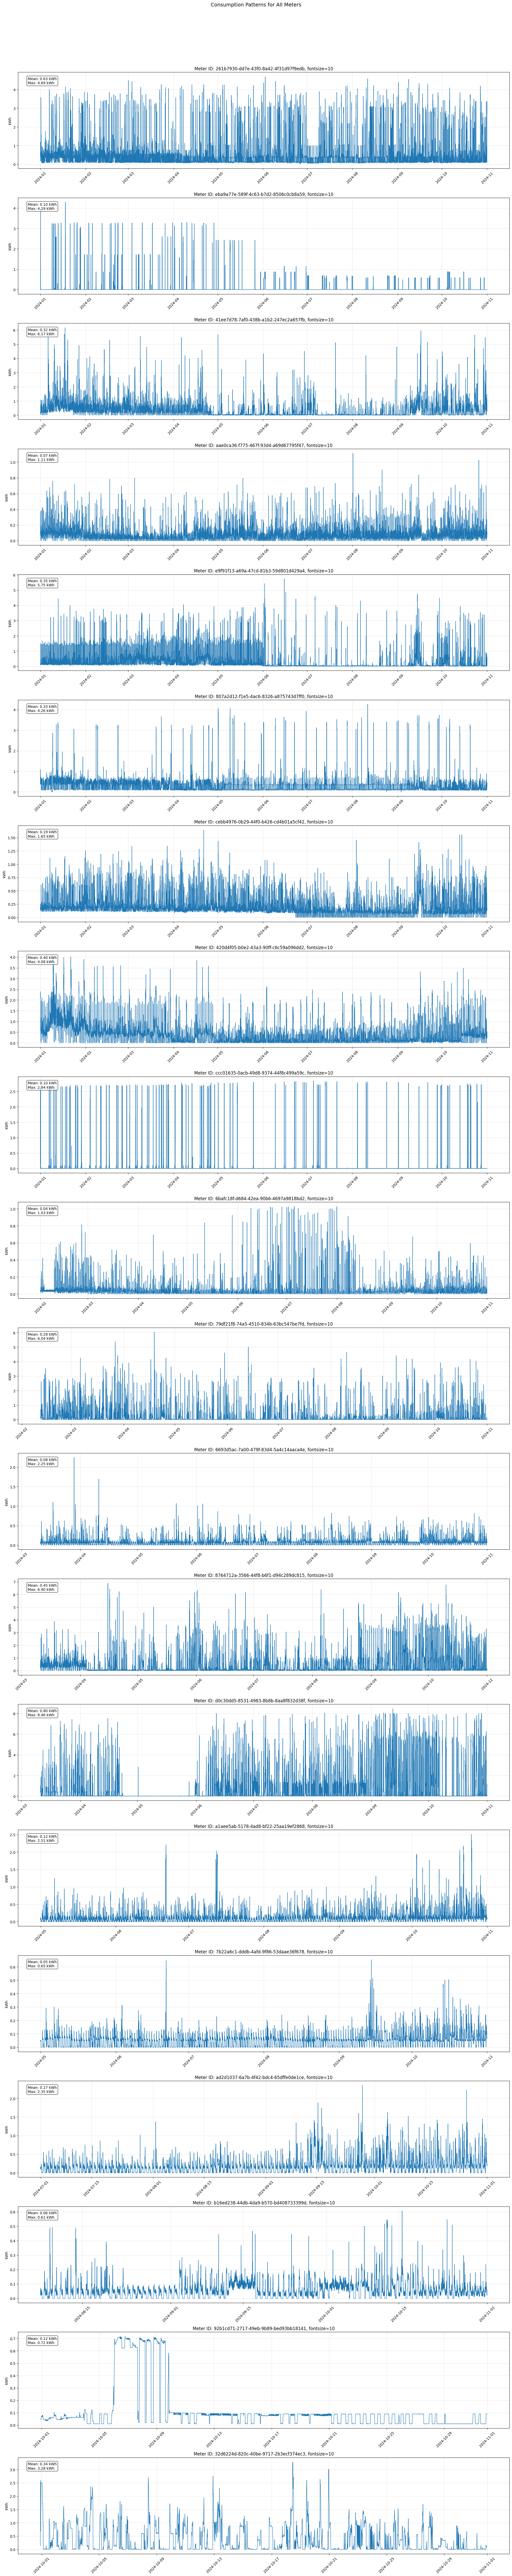

In [117]:
plot_meter_timeseries(consumptions_df, height_per_meter=5)

In [118]:
consumptions_df

meteringpoint_id                 validfrom  \
4       261b7930-dd7e-43f0-8a42-4f31d97f9edb 2024-01-01 00:00:00+00:00   
14      261b7930-dd7e-43f0-8a42-4f31d97f9edb 2024-01-01 00:15:00+00:00   
22      261b7930-dd7e-43f0-8a42-4f31d97f9edb 2024-01-01 00:30:00+00:00   
28      261b7930-dd7e-43f0-8a42-4f31d97f9edb 2024-01-01 00:45:00+00:00   
36      261b7930-dd7e-43f0-8a42-4f31d97f9edb 2024-01-01 01:00:00+00:00   
...                                      ...                       ...   
444067  eba9a77e-589f-4c63-b7d2-8506c0cb8a59 2024-10-31 22:45:00+00:00   
444089  eba9a77e-589f-4c63-b7d2-8506c0cb8a59 2024-10-31 23:00:00+00:00   
444108  eba9a77e-589f-4c63-b7d2-8506c0cb8a59 2024-10-31 23:15:00+00:00   
444134  eba9a77e-589f-4c63-b7d2-8506c0cb8a59 2024-10-31 23:30:00+00:00   
444153  eba9a77e-589f-4c63-b7d2-8506c0cb8a59 2024-10-31 23:45:00+00:00   

        quantity  hour  day_of_week  month        date  
4          0.156     0            0      1  2024-01-01  
14         0.306     0            0      1  2024-01-01  
22         0.211     0            0      1  2024-01-01  
28         0.184     0            0      1  2024-01-01  
36         0.523     1            0      1  2024-01-01  
...          ...   ...          ...    ...         ...  
444067     0.002    22            3     10  2024-10-31  
444089     0.001    23            3     10  2024-10-31  
444108     0.002    23            3     10  2024-10-31  
444134     0.001    23            3     10  2024-10-31  
444153     0.001    23            3     10  2024-10-31  

[444160 rows x 7 columns]

In [124]:
def plot_daily_patterns_with_intervals(consumptions, height_per_meter=3, width=20):
    """
    Plot daily consumption patterns with confidence intervals for each meter in separate subplots.
    """
    df = consumptions.copy()
    df['minute'] = df['validfrom'].dt.minute
    df['time_of_day'] = df['hour'] + df['minute']/60

    meter_ids = df['meteringpoint_id'].unique()
    n_meters = len(meter_ids)
    
    total_height = n_meters * height_per_meter
    
    # Create figure and subplots
    fig, axes = plt.subplots(n_meters, 1, figsize=(width, total_height))
    if n_meters == 1:
        axes = [axes] 
    
    print(f"Plotting {n_meters} meters with figure size: {width}x{total_height} inches")
    
    for ax, meter_id in zip(axes, meter_ids):
        # Get data for this meter
        meter_data = df[df['meteringpoint_id'] == meter_id].copy()
        
        grouped = meter_data.groupby(['hour', 'minute']).agg({
            'quantity': ['mean', 'std', 
                        lambda x: x.quantile(0.025), 
                        lambda x: x.quantile(0.975),
                        lambda x: x.quantile(0.25), 
                        lambda x: x.quantile(0.75)]
        }).reset_index()
        
        grouped.columns = ['hour', 'minute', 'mean', 'std', 
                         'ci_lower_95', 'ci_upper_95',
                         'ci_lower_50', 'ci_upper_50']
        
        grouped['time_of_day'] = grouped['hour'] + grouped['minute']/60
        
        # Plot confidence intervals
        ax.fill_between(grouped['time_of_day'], 
                       grouped['ci_lower_95'], 
                       grouped['ci_upper_95'],
                       alpha=0.2, color='blue', 
                       label='95% Interval')
        ax.fill_between(grouped['time_of_day'], 
                       grouped['ci_lower_50'], 
                       grouped['ci_upper_50'],
                       alpha=0.3, color='blue', 
                       label='50% Interval')
        
        ax.plot(grouped['time_of_day'], 
                grouped['mean'], 
                'b-', 
                label='Mean', 
                linewidth=2)
        
        ax.set_title(f'Meter ID: {meter_id}')
        ax.set_xlabel('Hour of Day')
        ax.set_ylabel('Consumption (kWh)')
        ax.grid(True, alpha=0.3)
        ax.legend()
        
        ax.set_xticks(range(0, 25, 2))
        
        stats_text = (
            f'Pattern Statistics:\n'
            f'Peak hour: {grouped.loc[grouped["mean"].idxmax(), "hour"]:02d}:00\n'
            f'Min hour: {grouped.loc[grouped["mean"].idxmin(), "hour"]:02d}:00\n'
            f'Max/Min ratio: {grouped["mean"].max() / grouped["mean"].min():.2f}'
        )
        ax.text(0.02, 0.95, stats_text,
                transform=ax.transAxes,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Add overall title
    fig.suptitle('Daily Consumption Patterns with Confidence Intervals', 
                 fontsize=14, y=1.0)
    
    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.98])  # Leave space for suptitle
    plt.show()

Plotting 20 meters with figure size: 20x60 inches


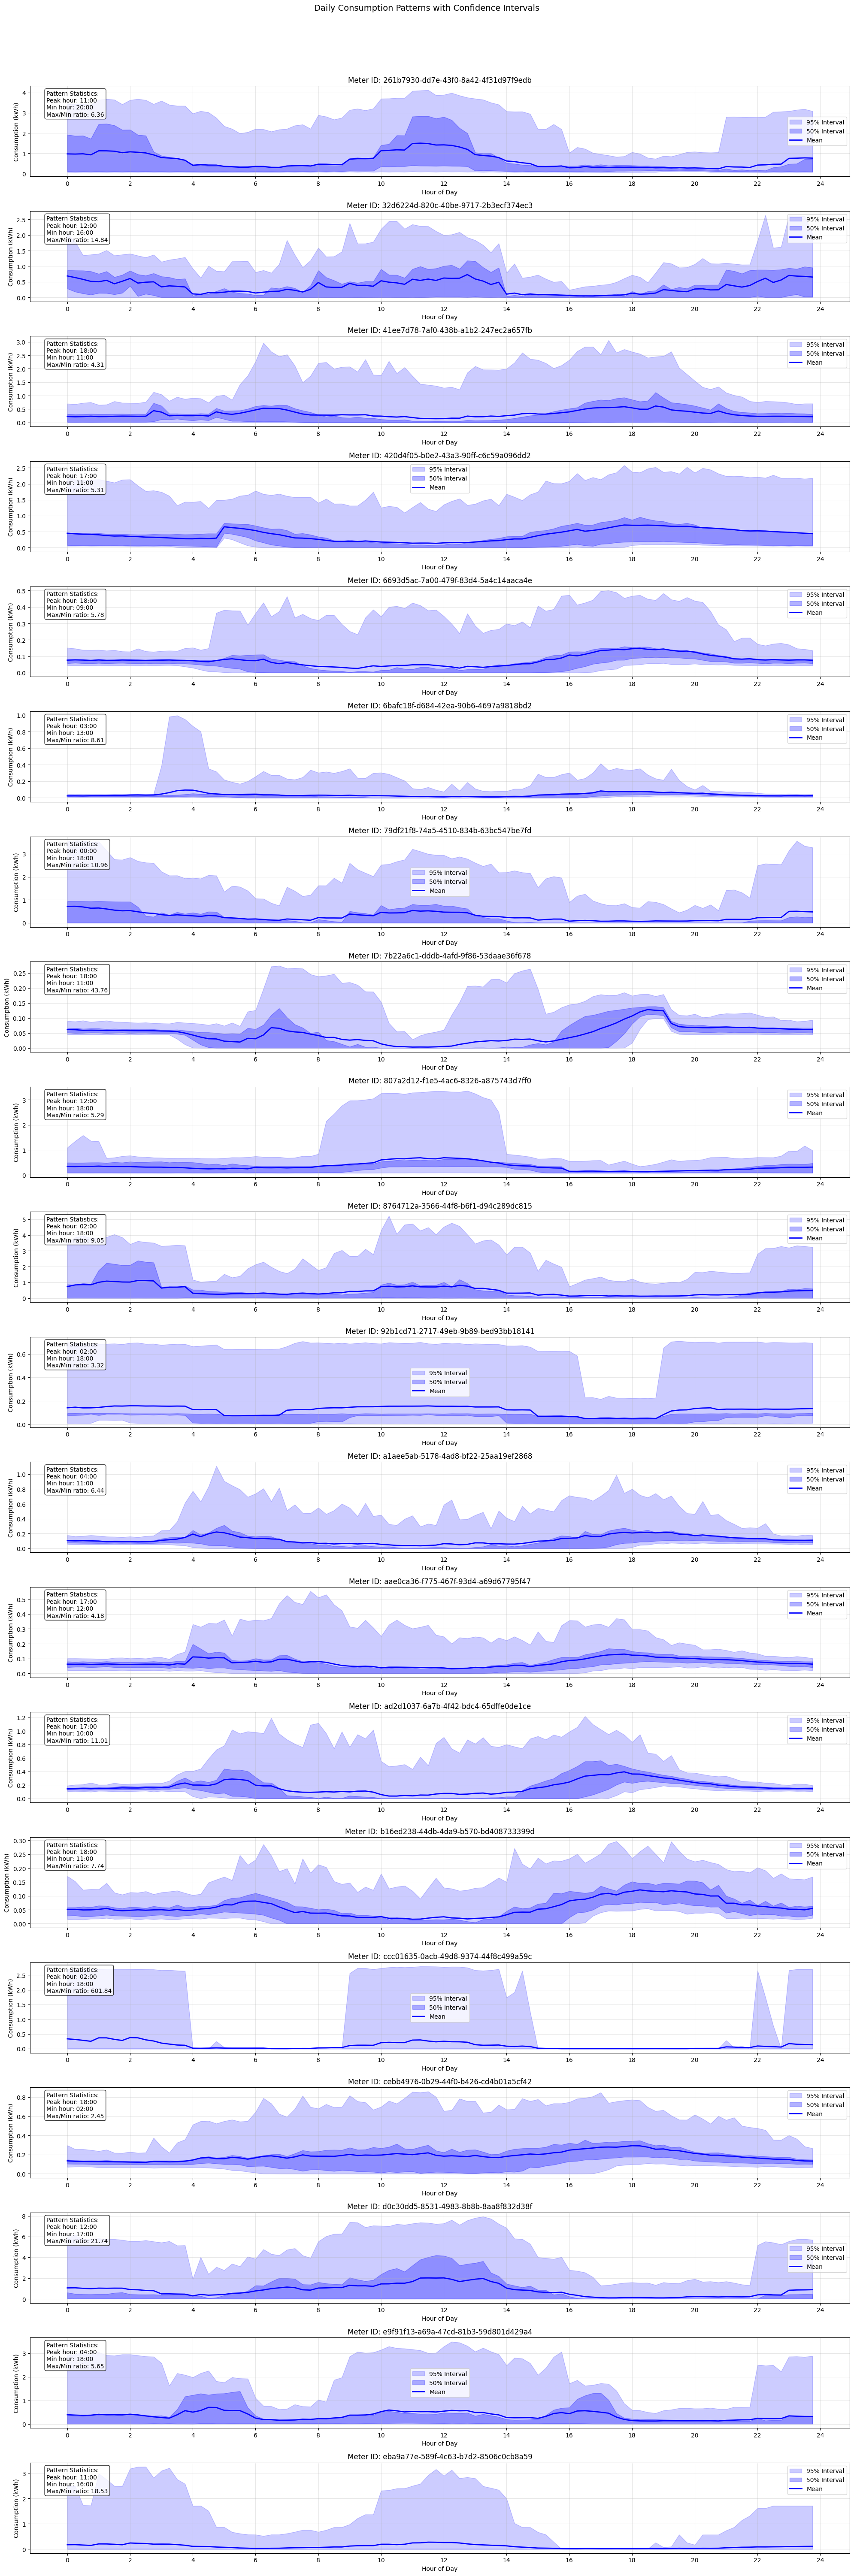

In [125]:
plot_daily_patterns_with_intervals(consumptions_df)

In [128]:
consumptions_df

meteringpoint_id                 validfrom  \
4       261b7930-dd7e-43f0-8a42-4f31d97f9edb 2024-01-01 00:00:00+00:00   
14      261b7930-dd7e-43f0-8a42-4f31d97f9edb 2024-01-01 00:15:00+00:00   
22      261b7930-dd7e-43f0-8a42-4f31d97f9edb 2024-01-01 00:30:00+00:00   
28      261b7930-dd7e-43f0-8a42-4f31d97f9edb 2024-01-01 00:45:00+00:00   
36      261b7930-dd7e-43f0-8a42-4f31d97f9edb 2024-01-01 01:00:00+00:00   
...                                      ...                       ...   
444067  eba9a77e-589f-4c63-b7d2-8506c0cb8a59 2024-10-31 22:45:00+00:00   
444089  eba9a77e-589f-4c63-b7d2-8506c0cb8a59 2024-10-31 23:00:00+00:00   
444108  eba9a77e-589f-4c63-b7d2-8506c0cb8a59 2024-10-31 23:15:00+00:00   
444134  eba9a77e-589f-4c63-b7d2-8506c0cb8a59 2024-10-31 23:30:00+00:00   
444153  eba9a77e-589f-4c63-b7d2-8506c0cb8a59 2024-10-31 23:45:00+00:00   

        quantity  hour  day_of_week  month        date  
4          0.156     0            0      1  2024-01-01  
14         0.306     0            0      1  2024-01-01  
22         0.211     0            0      1  2024-01-01  
28         0.184     0            0      1  2024-01-01  
36         0.523     1            0      1  2024-01-01  
...          ...   ...          ...    ...         ...  
444067     0.002    22            3     10  2024-10-31  
444089     0.001    23            3     10  2024-10-31  
444108     0.002    23            3     10  2024-10-31  
444134     0.001    23            3     10  2024-10-31  
444153     0.001    23            3     10  2024-10-31  

[444160 rows x 7 columns]